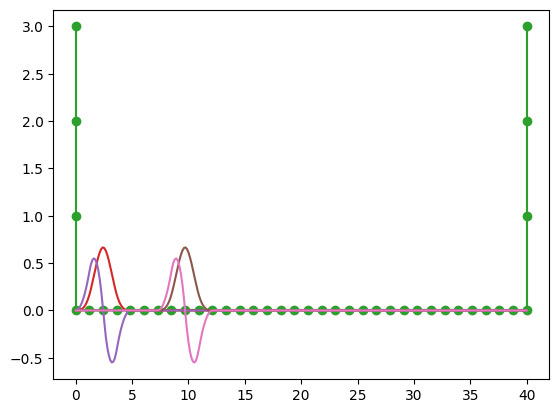

In [1]:

    
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 2*2.0*np.pi, 1000)
y = np.sin(x)


grid_bin = np.fromfile("../out/grid.bin", dtype=np.float64)
plt.plot(grid_bin, np.zeros(len(grid_bin)))
grid = np.loadtxt("../out/grid.dat")
plt.plot(grid, np.zeros(len(grid)), linestyle='--')
knots = np.loadtxt("../out/knotpoints.dat")
order_k = 4
knots_y = np.zeros(len(knots))
y_shift = order_k-1
for i in range(order_k-1):
    knots_y[i] = y_shift
    y_shift = y_shift - 1

y_shift = order_k-1
for i in range(order_k-1):
    knots_y[len(knots)-1-i] = y_shift
    y_shift = y_shift - 1
    
plt.plot(knots, knots_y, marker='o')


#bspline0 = np.loadtxt("../out/bspline0.dat")
#plt.plot(grid, bspline0)
#bspline1 = np.loadtxt("../out/bspline1.dat")
#plt.plot(grid, bspline1)
#bspline2 = np.loadtxt("../out/bspline2.dat")
#plt.plot(grid, bspline2)
bspline3 = np.loadtxt("../out/bspline3.dat")
plt.plot(grid, bspline3)
dBspline3 = np.loadtxt("../out/dBspline3.dat")
plt.plot(grid, dBspline3)
bspline9 = np.loadtxt("../out/bspline9.dat")
plt.plot(grid, bspline9)
dBspline9 = np.loadtxt("../out/dBspline9.dat")
plt.plot(grid, dBspline9)





(300, 36)
(40, 36)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

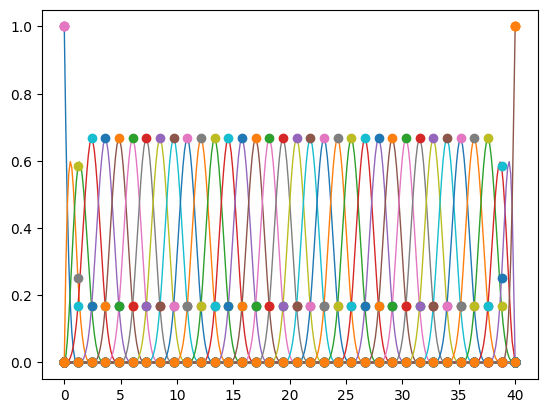

In [2]:
def plot_bsplines(x_axis, filename, mark=None, linewidth=1):
    bsplines = np.loadtxt(filename, skiprows=1)
    bspl_shape = bsplines.shape
    print(bspl_shape)
    num_rows = bspl_shape[0]
    num_cols = bspl_shape[1]
    for i in range(num_cols):
        bspl = bsplines[:, i]
        plt.plot(x_axis, bspl, marker=mark, linewidth=linewidth)

    return bsplines

plot_bsplines(grid, "../out/bsplines_grid.dat")
plot_bsplines(knots, "../out/bsplines_knots.dat", 'o', 0)

(300, 36)
(40, 36)


array([[-2.475,  2.475,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-2.475,  2.475,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-2.475,  2.475,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   , -2.475,  2.475],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , -2.475,  2.475],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , -2.475,  2.475]])

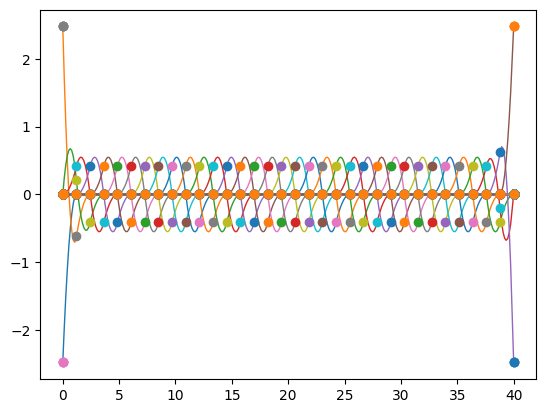

In [3]:
def plot_bsplines(x_axis, filename, mark=None, linewidth=1):
    bsplines = np.loadtxt(filename, skiprows=1)
    bspl_shape = bsplines.shape
    print(bspl_shape)
    num_rows = bspl_shape[0]
    num_cols = bspl_shape[1]
    for i in range(num_cols):
        bspl = bsplines[:, i]
        plt.plot(x_axis, bspl, marker=mark, linewidth=linewidth)

    return bsplines;

plot_bsplines(grid, "../out/dBsplines_grid.dat")
plot_bsplines(knots, "../out/dBsplines_knots.dat", 'o', 0)

['../out\\eigvec_n1_l0.dat', '../out\\eigvec_n2_l0.dat', '../out\\eigvec_n2_l1.dat', '../out\\eigvec_n2_l2.dat', '../out\\eigvec_n3_l0.dat', '../out\\eigvec_n3_l1.dat', '../out\\eigvec_n3_l2.dat', '../out\\eigvec_n4_l0.dat', '../out\\eigvec_n4_l1.dat', '../out\\eigvec_n4_l2.dat', '../out\\eigvec_n5_l0.dat', '../out\\eigvec_n5_l1.dat', '../out\\eigvec_n5_l2.dat', '../out\\eigvec_n6_l0.dat', '../out\\eigvec_n6_l1.dat', '../out\\eigvec_n6_l2.dat', '../out\\eigvec_n7_l0.dat', '../out\\eigvec_n7_l1.dat']
0.9057779751578006
1.143877952167778
1.1743290046205583
1.1827087771300517
1.1603802289714296
1.1243543744112374
1.0943493939170792


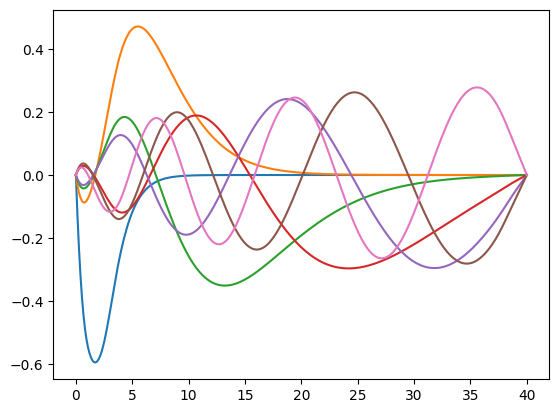

In [4]:
import glob
bsplines = np.loadtxt("../out/bsplines_grid.dat", skiprows=1)
eigvec_filenames = glob.glob("../out/eigvec*.dat")
print(eigvec_filenames)
for fn in eigvec_filenames:
    if fn.endswith("l0.dat"):
        coeffs = np.loadtxt(fn);
        radialwf = np.sum(coeffs*bsplines[:,1:-1], axis=1)
        rwf2 = radialwf*radialwf
        dx = grid[11] - grid[10]
        norm = np.sum(rwf2*dx)
        print(norm)
        plt.plot(grid, radialwf)
    
#for i in range(3):
#  coeffs = np.loadtxt("../out/eigvec_" + str(i) + ".dat")
#  radialwf = np.sum(coeffs*bsplines[:,1:-1], axis=1)
#  plt.plot(grid, radialwf)

#print(np.sum(radialwf)/(grid[len(grid)-1]-grid[0]))

1.164664523668953
1.178720076854692
1.1855372459631202
1.1657574473905619
1.1321393919690323
1.1003187975969593


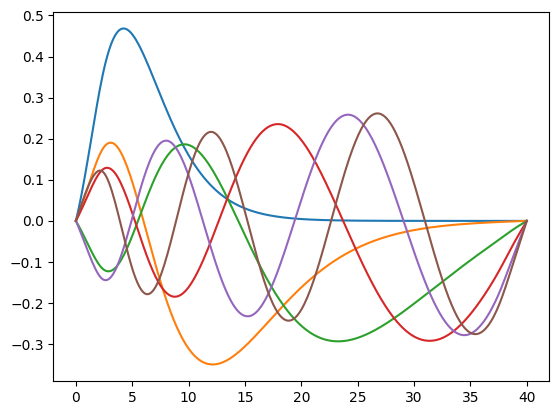

In [5]:
for fn in eigvec_filenames:
    if fn.endswith("l1.dat"):
        coeffs = np.loadtxt(fn);
        radialwf = np.sum(coeffs*bsplines[:,1:-1], axis=1)
        rwf2 = radialwf*radialwf
        dx = grid[11] - grid[10]
        norm = np.sum(rwf2*dx)
        print(norm)
        plt.plot(grid, radialwf)
    

1.1996196371755083
1.1961280253726772
1.1812391702326197
1.1537651227724715
1.123665366440246


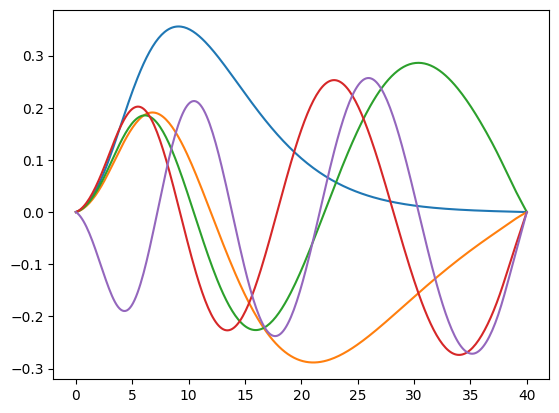

In [6]:
for fn in eigvec_filenames:
    if fn.endswith("l2.dat"):
        coeffs = np.loadtxt(fn);
        radialwf = np.sum(coeffs*bsplines[:,1:-1], axis=1)
        rwf2 = radialwf*radialwf
        dx = grid[11] - grid[10]
        norm = np.sum(rwf2*dx)
        print(norm)
        plt.plot(grid, radialwf)
    